In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k/data_preview
bike_count = pd.read_csv('Fremont_Bridge_Bicycle_Counter_20240527.csv', index_col='Date', parse_dates=True)
bike_count.head()

<ipython-input-5-4ea53dde4151>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bike_count = pd.read_csv('Fremont_Bridge_Bicycle_Counter_20240527.csv', index_col='Date', parse_dates=True)


,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


In [6]:
bike_count.columns = ['Total', 'West', 'East']
bike_count.head()

,Total,West,East
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


In [13]:
#https://www.ncdc.noaa.gov/cdo-web/search
weather = pd.read_csv('3700437.csv', index_col='DATE', parse_dates=True)
weather.head()

,STATION,NAME,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,...,WT05,WT06,WT08,WT09,WT13,WT14,WT16,WT17,WT18,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.00,0.0,0.0,NaN,55.0,41.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2012-01-02,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.43,0.0,0.0,NaN,51.0,37.0,180.0,200.0,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2012-01-03,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.03,0.0,0.0,NaN,53.0,45.0,180.0,170.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2012-01-04,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.80,0.0,0.0,NaN,54.0,42.0,180.0,190.0,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2012-01-05,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.05,0.0,0.0,NaN,48.0,37.0,200.0,220.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [14]:
weather.columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN',
       'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05',
       'WT06', 'WT08', 'WT09', 'WT13', 'WT14', 'WT16', 'WT17', 'WT18', 'WT22'],
      dtype='object')

In [15]:
# look at data prior to 2020-01-01 covid
bike_count_pre_covid = bike_count[bike_count.index < '2020-01-01']
bike_count_pre_covid.tail()

,Total,West,East
Date,,,
2019-12-31 19:00:00,19.0,8.0,11.0
2019-12-31 20:00:00,13.0,6.0,7.0
2019-12-31 21:00:00,15.0,8.0,7.0
2019-12-31 22:00:00,15.0,5.0,10.0
2019-12-31 23:00:00,16.0,7.0,9.0


In [16]:
weather_pre_covid = weather[weather.index < '2020-01-01']
weather_pre_covid.tail(10)
# temp is in Fahrenheit

,STATION,NAME,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,...,WT05,WT06,WT08,WT09,WT13,WT14,WT16,WT17,WT18,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
2019-12-22,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.14,0.0,0.0,43.0,44.0,40.0,10.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-23,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.29,0.0,0.0,42.0,44.0,38.0,130.0,130.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-24,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.00,0.0,0.0,38.0,40.0,33.0,220.0,220.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-25,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.00,0.0,0.0,40.0,44.0,33.0,20.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-26,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.05,0.0,0.0,35.0,39.0,30.0,120.0,120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-27,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.01,0.0,0.0,39.0,45.0,37.0,190.0,190.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-28,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.00,0.0,0.0,44.0,47.0,41.0,160.0,140.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-29,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.01,0.0,0.0,45.0,51.0,40.0,120.0,140.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-30,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.04,0.0,0.0,46.0,48.0,43.0,200.0,200.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#weather_pre_covid['TMAX'].max()

In [17]:
# daily bicycle traffic
daily = bike_count_pre_covid.resample('d').sum()
daily.head()

,Total,West,East
Date,,,
2012-10-02,1938.0,1165.0,773.0
2012-10-03,3521.0,1761.0,1760.0
2012-10-04,3475.0,1767.0,1708.0
2012-10-05,3148.0,1590.0,1558.0
2012-10-06,2006.0,926.0,1080.0


In [ ]:
#Return the sum of the values over the requested axis.
# new_daily_df = daily.sum(axis=1) #sum of values along row
# new_daily_df.head()

In [18]:
daily['Total'] = daily.sum(axis=1) # not sure why summed this
daily.head()

,Total,West,East
Date,,,
2012-10-02,3876.0,1165.0,773.0
2012-10-03,7042.0,1761.0,1760.0
2012-10-04,6950.0,1767.0,1708.0
2012-10-05,6296.0,1590.0,1558.0
2012-10-06,4012.0,926.0,1080.0


In [19]:
daily = daily[['Total']] # remove other cols
daily.head()

,Total
Date,
2012-10-02,3876.0
2012-10-03,7042.0
2012-10-04,6950.0
2012-10-05,6296.0
2012-10-06,4012.0


In [20]:
# indicate day of week
daily.index.day_of_week

Index([1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       ...
       6, 0, 1, 2, 3, 4, 5, 6, 0, 1],
      dtype='int32', name='Date', length=2647)

In [21]:
daily.index.day_of_week == 1

array([ True, False, False, ..., False, False,  True])

In [22]:
(daily.index.day_of_week == 1).astype(float)

array([1., 0., 0., ..., 0., 0., 1.])

In [23]:
# ridership pattern can be different on different days
days = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
for i in range(7):
  daily[days[i]] = (daily.index.dayofweek == i).astype(float)

daily.head()

,Total,Mon,Tues,Wed,Thurs,Fri,Sat,Sun
Date,,,,,,,,
2012-10-02,3876.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
# ridership pattern can be different over holidays
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
#Returns a curve with holidays between start_date and end_date
holidays = cal.holidays(start='2012', end='2020')
holidays

DatetimeIndex(['2012-01-02', '2012-01-16', '2012-02-20', '2012-05-28',
               '2012-07-04', '2012-09-03', '2012-10-08', '2012-11-12',
               '2012-11-22', '2012-12-25', '2013-01-01', '2013-01-21',
               '2013-02-18', '2013-05-27', '2013-07-04', '2013-09-02',
               '2013-10-14', '2013-11-11', '2013-11-28', '2013-12-25',
               '2014-01-01', '2014-01-20', '2014-02-17', '2014-05-26',
               '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11',
               '2014-11-27', '2014-12-25', '2015-01-01', '2015-01-19',
               '2015-02-16', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25',
               '2016-01-01', '2016-01-18', '2016-02-15', '2016-05-30',
               '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11',
               '2016-11-24', '2016-12-26', '2017-01-02', '2017-01-16',
               '2017-02-20', '2017-05-29', '2017-07-04', '2017-09-04',
      

In [25]:
pd.Series(1, index=holidays, name='holiday')

2012-01-02    1
2012-01-16    1
2012-02-20    1
2012-05-28    1
2012-07-04    1
             ..
2019-10-14    1
2019-11-11    1
2019-11-28    1
2019-12-25    1
2020-01-01    1
Name: holiday, Length: 81, dtype: int64

In [28]:
#daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily.head(10)

,Total,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-02,3876.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
2012-10-08,7074.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2012-10-09,7002.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
2012-10-10,6470.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
#daily[daily['holiday'] == 1.0]

In [29]:
daily.fillna(0, inplace=True)
daily.head()

,Total,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-02,3876.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


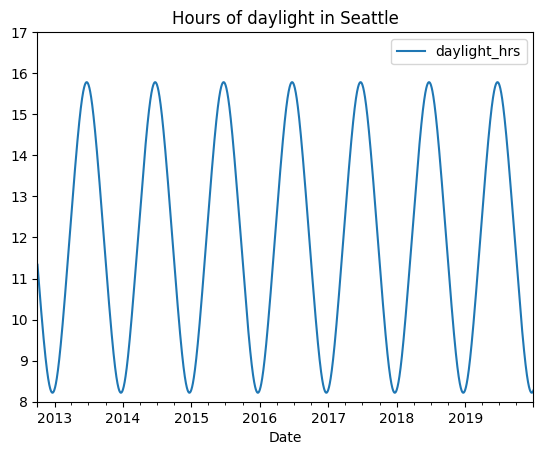

In [30]:
#Hours of sunlight can affect ridership patterns
def hours_of_daylight(date, axis=23.44, latitude=47.61):
  '''
  Compute hours of daylight for the given date
  '''
  days = (date - pd.to_datetime('2000-12-21')).days
  m = (1. - np.tan(np.radians(latitude)) * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi/ 365.25)))

  return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot();
plt.ylim(8, 17);
plt.title('Hours of daylight in Seattle');


In [ ]:
#hours_of_daylight(daily.index)

In [ ]:
#list(map(hours_of_daylight, daily.index))

In [ ]:
#daily.index

In [35]:
# Add avg temp and precipation to data
# add flag for a dry day - precipation is 0
weather.head()

,STATION,NAME,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,...,WT09,WT13,WT14,WT16,WT17,WT18,WT22,Temp (F),Rainfall (in),dry day
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.00,0.0,0.0,NaN,55.0,41.0,100.0,90.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,48.0,0.00,1
2012-01-02,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.43,0.0,0.0,NaN,51.0,37.0,180.0,200.0,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,44.0,0.43,0
2012-01-03,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.03,0.0,0.0,NaN,53.0,45.0,180.0,170.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,49.0,0.03,0
2012-01-04,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.80,0.0,0.0,NaN,54.0,42.0,180.0,190.0,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,48.0,0.80,0
2012-01-05,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",0.05,0.0,0.0,NaN,48.0,37.0,200.0,220.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,42.5,0.05,0


In [36]:
daily.head()

,Total,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,holiday,daylight_hrs,Rainfall (in),Temp (F),dry day
Date,,,,,,,,,,,,,
2012-10-02,3876.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.335681,0.0,57.0,1
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,56.0,1
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,56.5,1
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,59.5,1
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,60.5,1


In [37]:
weather['Temp (F)'] = .5 * (weather['TMAX'] + weather['TMIN'])
weather['Rainfall (in)'] = weather['PRCP']
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

#daily = daily.join(weather[['Rainfall (in)', 'Temp (F)', 'dry day']])
daily.head()



,Total,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,holiday,daylight_hrs,Rainfall (in),Temp (F),dry day
Date,,,,,,,,,,,,,
2012-10-02,3876.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.335681,0.0,57.0,1
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,56.0,1
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,56.5,1
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,59.5,1
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,60.5,1


In [ ]:
#(weather['PRCP'] == 0).astype(int) # 1 means true, prcp = 0

In [38]:
# add counter that increases from day 1 and measures how many years have passed
daily['annual'] = (daily.index - daily.index[0]).days/ 365

In [39]:
daily.head()

,Total,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,holiday,daylight_hrs,Rainfall (in),Temp (F),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-02,3876.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.335681,0.0,57.0,1,0.000000
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,56.0,1,0.002740
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,56.5,1,0.005479
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,59.5,1,0.008219
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,60.5,1,0.010959


In [41]:
from sklearn.linear_model import LinearRegression
# linear regression
# drop null vals
daily.dropna(axis=0, how='any', inplace=True)
column_names = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'holiday', 'daylight_hrs', 'Rainfall (in)', 'Temp (F)', 'dry day', 'annual']

'''
X = independent variable
y = dependent variable
Linear regression predicts relationship between two variables
'''
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

<Axes: xlabel='Date'>

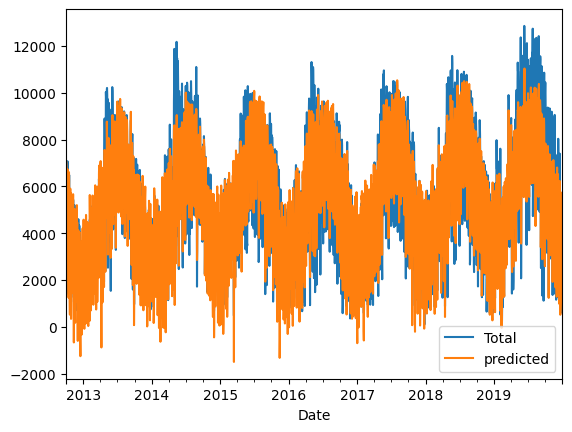

In [42]:
# compare total and predicted bicycle traffic visually
daily[['Total', 'predicted']].plot()
# data and predictions do not line up exactly.

In [43]:
'''
look at coefficients to see how much each feature contributes to the daily bicyle count
model coefficient = slope
The slope represents the change in y (daily total ridership number) for each unit change in X (different features)
'''
params = pd.Series(model.coef_, index=X.columns)
params

Mon             -1659.031859
Tues            -1442.936409
Wed             -1485.433417
Thurs           -1744.420708
Fri             -2422.100854
Sat             -5222.444347
Sun             -5401.607278
holiday         -2502.207217
daylight_hrs      205.129795
Rainfall (in)   -1393.999681
Temp (F)           89.408200
dry day          1053.452853
annual            163.238766
dtype: float64

In [44]:
# measure uncertainity
from sklearn.utils import resample

np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_ for i in range(1000)], 0)

In [46]:
'''
effect = slope
model coefficient = slope
The slope represents the change in y (daily total ridership number) for each unit change in X (different features)
'''

pd.DataFrame({
    'effect': params.round(0),
    'uncertainity': err.round(0)
})

,effect,uncertainity
Mon,-1659.0,140.0
Tues,-1443.0,140.0
Wed,-1485.0,139.0
Thurs,-1744.0,138.0
Fri,-2422.0,136.0
Sat,-5222.0,132.0
Sun,-5402.0,135.0
holiday,-2502.0,201.0
daylight_hrs,205.0,13.0
Rainfall (in),-1394.0,94.0


In [ ]:
'''
Conclusions
1) There are thousands fewer riders over the weekend when compared with weekday.
2) daylight_hrs = Hours of daylight in a day
With every additional hour of daylight, 205 +- 13 more riders ride bike daily
3) Temp(F) = with temp increase of 1 degree F, 89 +- 3 more riders increase
4) dry day (no rain) , encourages 1053+- 51 more riders to ride
5) Rainfall(in) = Every inch of rainfall encourages 1394 +-94 riders to choose different modes of transport.
Once all effects are accounted for, there is a modest increase of 163 +- 11 new daily riders per year.

'''